En résumé, j'ai crée un modèle Deep Learning robuste qui détecte des tumeurs et il va determiner si la tumeur est cancéreuse ou pas.
Tout abord il y avait eu un pretraitement des données, la récupération des données, étiqueter les données, combiner les données, melager les données.
Créer ensuite le modèle DL, faire l'entraînement, evaluer la performance du modele, refaire les entraiments jusqu'a avoir un meilleur resulat
Ensuite sauvegarder le modèle(l'architecture, les poids), et faire le depoloiment en production
Voici un peu le résultat à 99% ci dessous

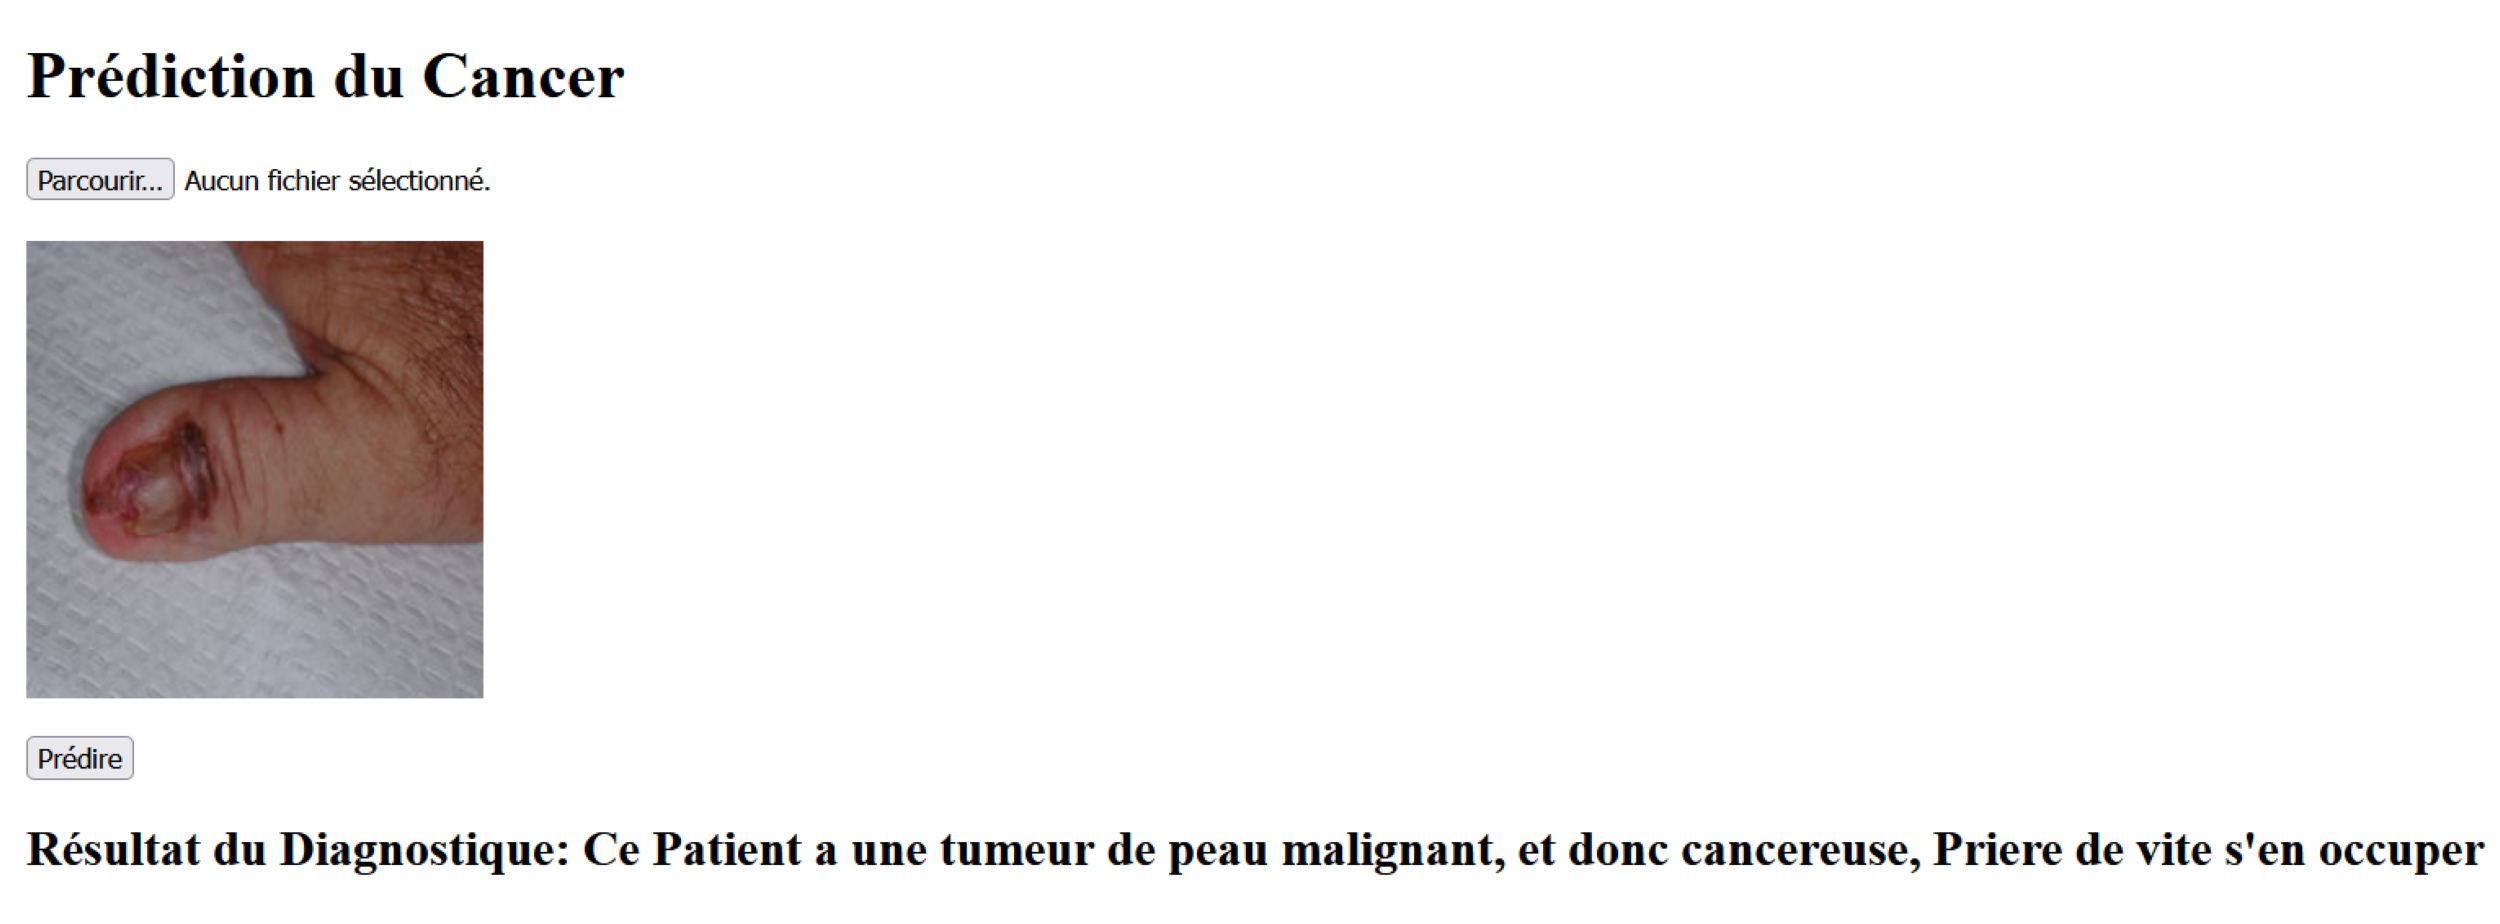

In [30]:
import matplotlib.image as mpimg

plt.figure(figsize=(32, 32))

image_path2 = 'C:/Users/efiom/Desktop/capt/can.png'
#l'image chargée 
img2 = mpimg.imread(image_path2)
# Affichez l'image
plt.imshow(img)
plt.imshow(img2)
plt.axis('off') # Pour ne pas afficher les axes
plt.show()
plt.show()


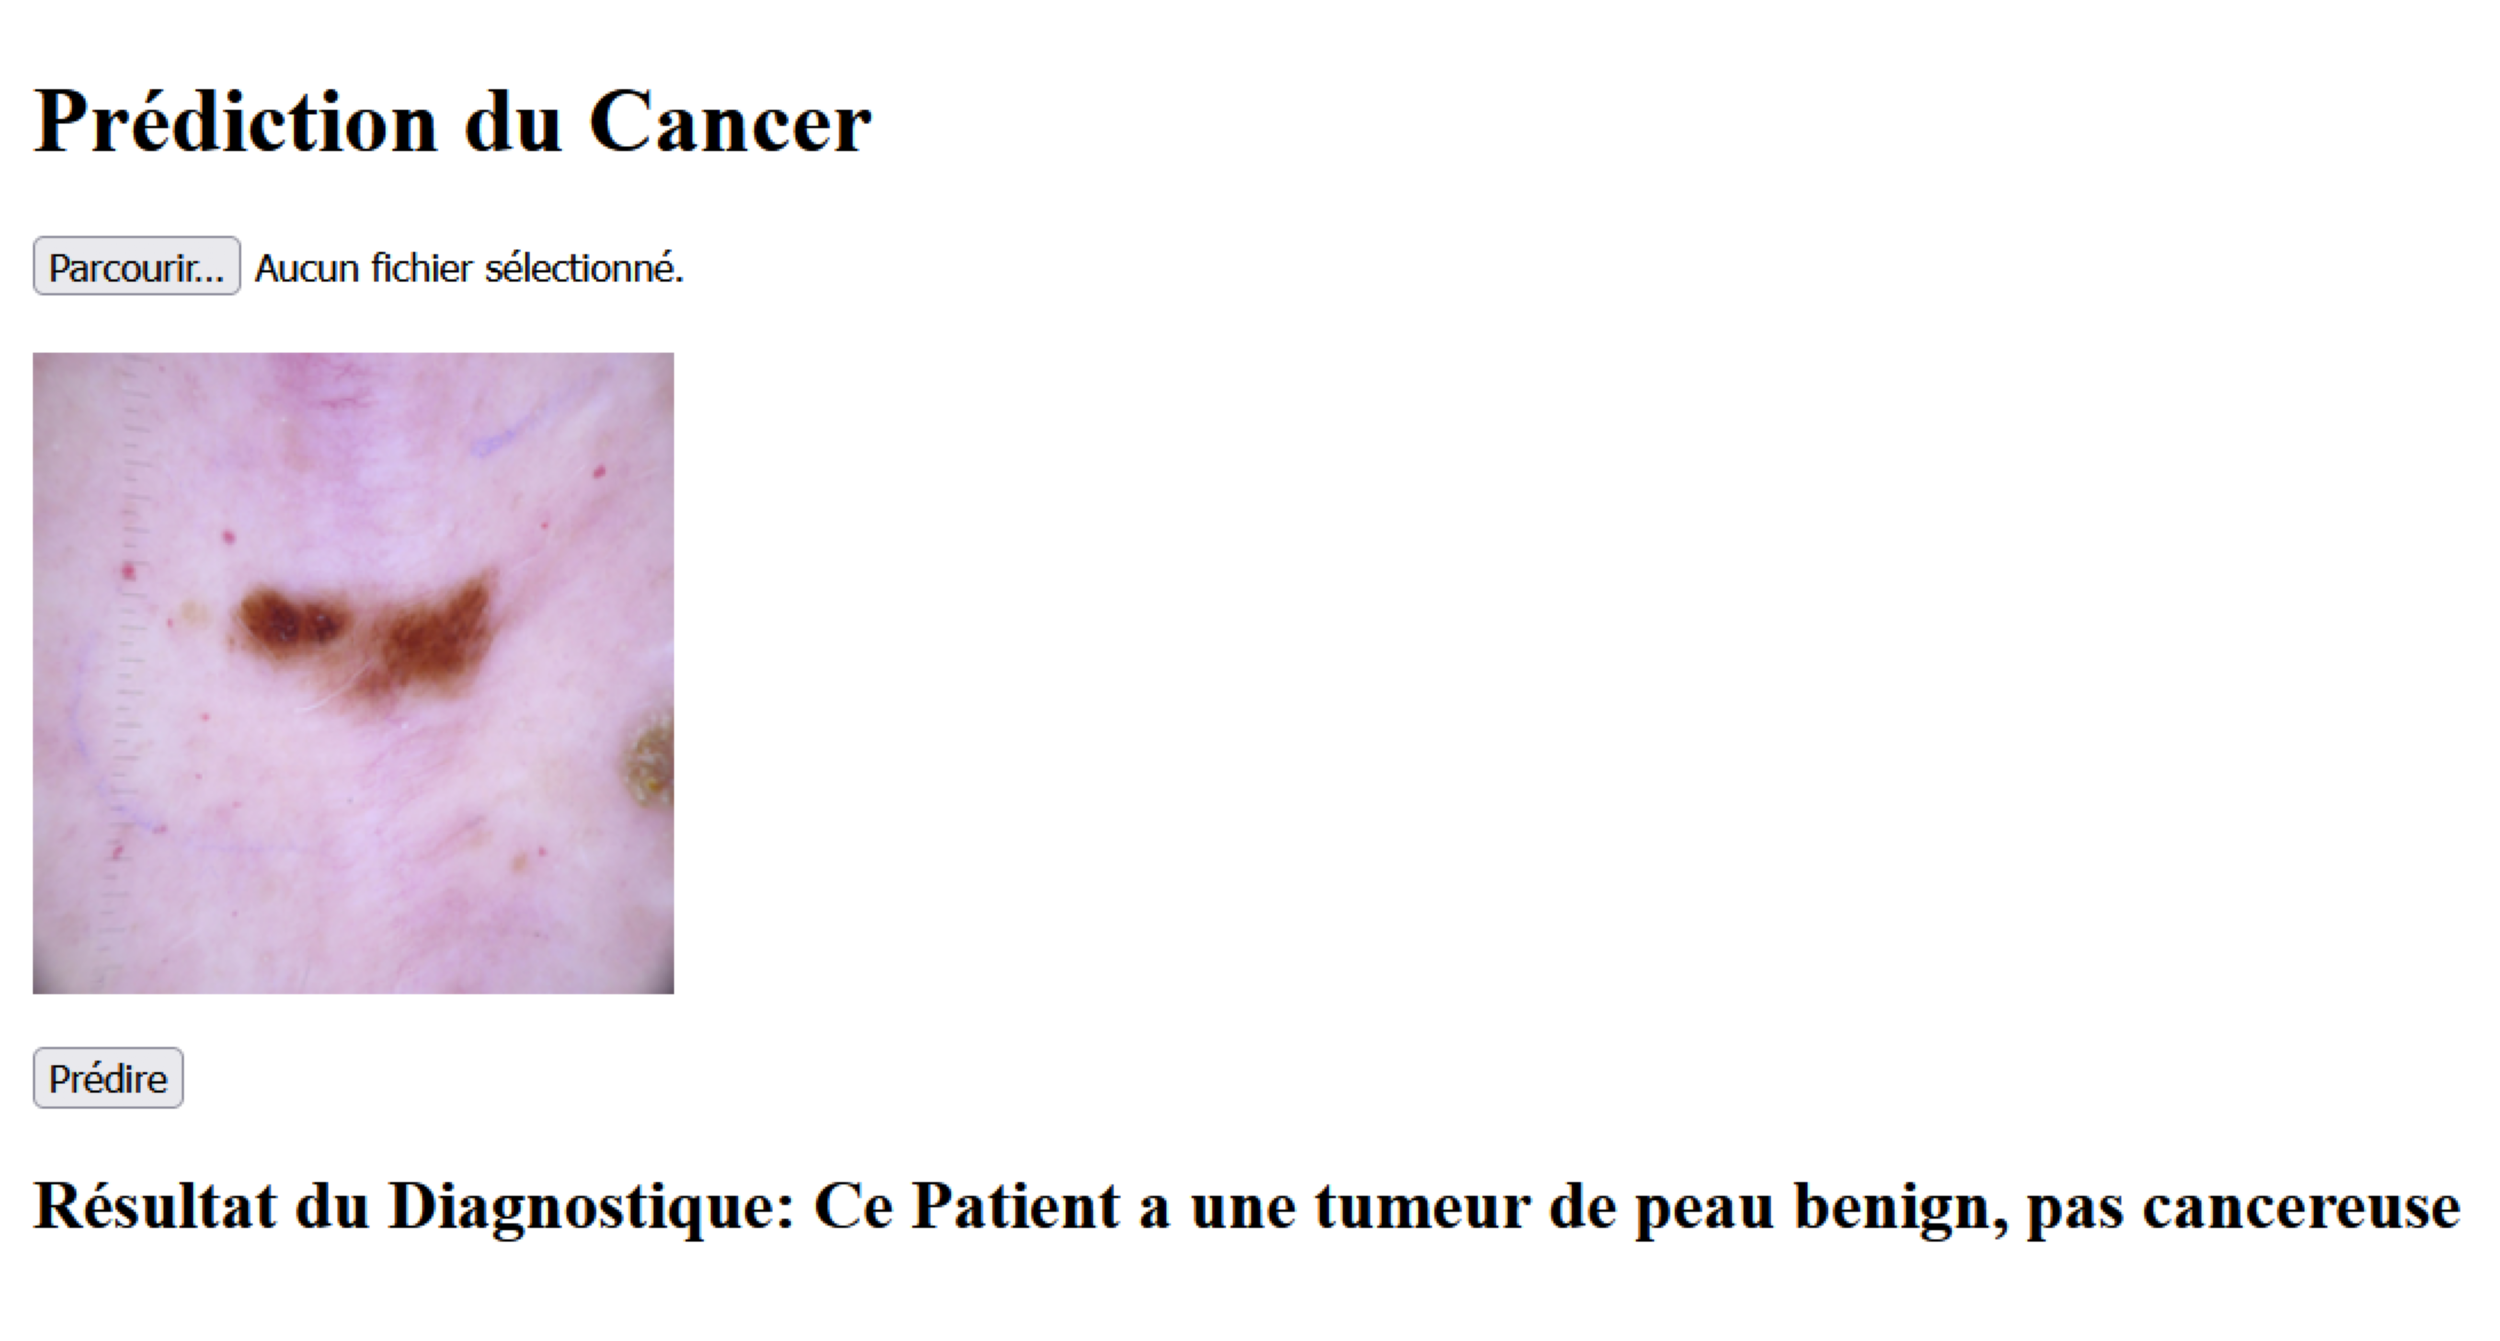

In [29]:
plt.figure(figsize=(32, 32))
image_path = 'C:/Users/efiom/Desktop/capt/predictcancer.png'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Solution : Installer Keras

Vérifiez que vous avez TensorFlow : Depuis TensorFlow 2.0, Keras est inclus dans TensorFlow. Donc, vous pouvez installer TensorFlow qui contient keras. Exécutez cette commande dans votre terminal ou votre environnement Anaconda :
pip install tensorflow
Installer Keras directement (si nécessaire) : Si vous voulez installer Keras en tant que package séparé, vous pouvez l'installer directement avec la commande suivante :
pip install keras

In [1]:
#!pip install tensorflow
#pip install keras
#!pip install --upgrade tensorflow keras

In [2]:
#1
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from tensorflow.keras.utils import to_categorical# used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.applications import ResNet50
from keras import backend as K 

Dans cette étape, je charge les images et les transforme en tableaux numpy en utilisant leurs valeurs RVB. Comme les images ont déjà été redimensionnées à 224x224, il n'est pas nécessaire de les redimensionner. Comme les images ne comportent pas d’étiquettes, celles-ci doivent être créées. Enfin, les images sont ajoutées dans un grand ensemble de formation et mélangées.

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

est une fonction anonyme (ou fonction lambda) qui lit une image, la convertit en tableau NumPy, et la convertit en mode RGB (Red, Green, Blue). Voici une explication détaillée de chaque partie :

    lambda imname: ... :
        Il s'agit d'une fonction lambda en Python, qui est une fonction anonyme, c'est-à-dire une fonction définie sans utiliser le mot-clé def. Ici, elle prend un seul paramètre, imname, qui est censé être le nom ou le chemin d'une image.

    Image.open(imname) :
        Cette partie utilise la bibliothèque Pillow (importée en tant que Image) pour ouvrir l'image dont le nom ou le chemin est donné par imname.

    .convert("RGB") :
        Cette méthode convertit l'image ouverte en mode RGB, qui est un espace de couleurs basé sur les trois canaux : Rouge, Vert et Bleu (Red, Green, Blue). Cela garantit que l'image sera traitée comme une image couleur avec trois canaux.

    np.asarray(...) :
        Cette fonction de NumPy convertit l'image (qui est sous la forme d'un objet Pillow) en un tableau NumPy, ce qui permet de traiter l'image sous forme de données numériques (par exemple, pour faire de la manipulation d'image, du traitement de données, etc.).

s = np.arange(X_train.shape[0]) :

    np.arange(X_train.shape[0]) génère un tableau d'indices allant de 0 à X_train.shape[0] - 1, où X_train.shape[0] représente le nombre total d'images dans l'ensemble d'entraînement.
    Par exemple, si X_train contient 250 images, alors np.arange(250) renvoie un tableau d'indices : [0, 1, 2, ..., 249].

np.random.shuffle(s) :

    np.random.shuffle(s) mélange aléatoirement les indices dans le tableau s. Cela modifie l'ordre des indices pour assurer que les données et leurs étiquettes sont mélangées de manière aléatoire.
    Par exemple, si s était [0, 1, 2, ..., 249], après mélange, il pourrait devenir quelque chose comme [15, 230, 100, ..., 75].

X_train = X_train[s] :

    Cette ligne réorganise les images dans X_train en suivant l'ordre des indices dans le tableau s. Cela signifie que les images sont mélangées selon l'ordre aléatoire défini dans s.
    Par exemple, si s est [15, 230, 100, ...], alors X_train[15] deviendra la première image, X_train[230] deviendra la deuxième, etc.

In [3]:
#2 Loading

folder_benign_train = 'C:/Users/efiom/Desktop/Outils/Projets/Stage de recherche/detectioncancer/data/data/train/benign'
folder_malignant_train = 'C:/Users/efiom/Desktop/Outils/Projets/Stage de recherche/detectioncancer/data/data/train/malignant'

folder_benign_test = 'C:/Users/efiom/Desktop/Outils/Projets/Stage de recherche/detectioncancer/data/data/test/benign'
folder_malignant_test = 'C:/Users/efiom/Desktop/Outils/Projets/Stage de recherche/detectioncancer/data/data/test/benign'

#on va defnir une fonction read anonyme lambda qui prend un seul parametre imname
read= lambda imname: np.asarray(Image.open(imname).convert("RGB"))#mettre en tableau pour la manipulation

# Load in training pictures 
ims_benign=[read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)] #path.join(folder_benign_train, nomImage)
X_benign=np.array(ims_benign, dtype='uint8') #mettre la liste en un tableau
ims_malignant=[read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant=np.array(ims_malignant, dtype='uint8')


# Load Testing pictures
ims_benign=[read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test=np.array(ims_benign, dtype='uint8')
ims_malignant=[read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test=np.array(ims_malignant,'uint8')

#on va creer les labels
y_benign=np.zeros(X_benign.shape[0])#X_benign.shape[0] renvoie le nombre d'images (le nombre de lignes du tableau)=nombre d'exemples d'images bénignes que vous avez.
y_malignant=np.ones(X_malignant.shape[0])

y_benign_test=np.zeros(X_benign_test.shape[0])
y_malignant_test=np.ones(X_malignant_test.shape[0])

#ensuite merge data
X_train=np.concatenate((X_benign, X_malignant), axis=0)#axis=0 =>la concaténation se fait verticalement (par ligne),en empilant les données d'images
y_train=np.concatenate((y_benign, y_malignant), axis=0)#y_train : contient toutes les étiquettes associées à ces images, à savoir 0 pour les images bénignes et 1 pour les images malignes.

X_test= np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test= np.concatenate((y_benign_test, y_malignant_test), axis=0)

#ensuite on melange les donnees
s=np.arange(X_train.shape[0]) # va creer les indice en parcourant tout le tab,X_train.shape[0]=nmbr total d'images
np.random.shuffle(s) #ensuite on melange aleatoiremnt les indice
X_train=X_train[s]
y_train=y_train[s]

s=np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test= X_test[s]
y_test=y_test[s]


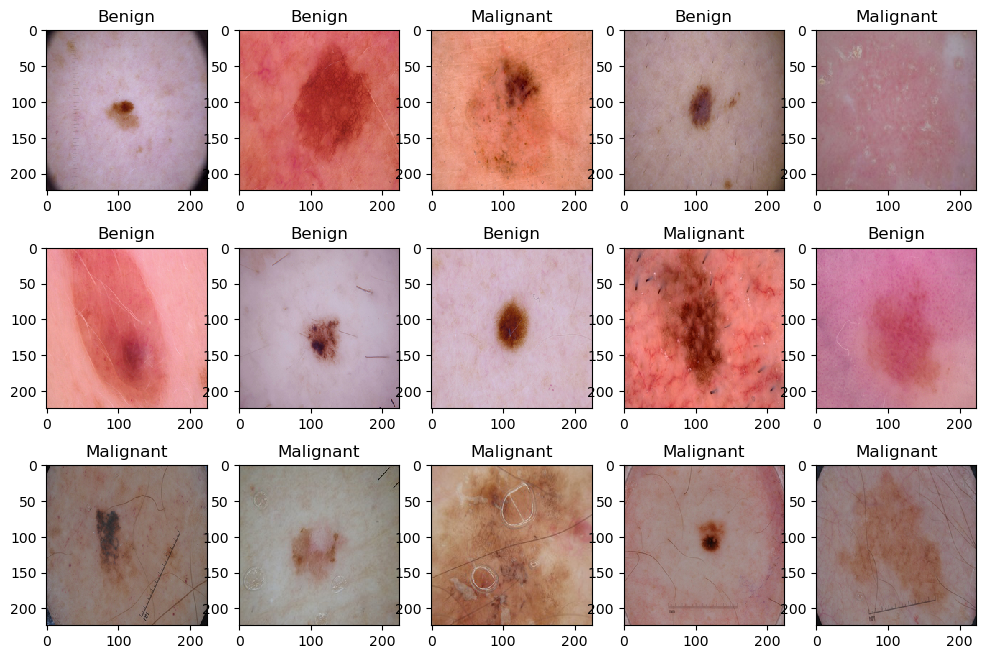

In [4]:
# Display first 15 images of moles, and how they are classified

fig=plt.figure(figsize=(12, 8))
rows=3
columns=5
#on parcours les photo
for i in range(1, columns*rows +1):
    ax=fig.add_subplot(rows, columns, i)#ajputer un sous schema
    if y_train[i]==0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')#on sort de la condition pour afficher
plt.show() #facultatif

In [5]:
#3
#Categorical Labels; Turn labels into one hot encoding
y_train=to_categorical(y_train, num_classes=2)#num_classes:Nmr de classes de sortie(dans ce cas,c'est un problème de classification binaire,=> 2 classes)
y_test=to_categorical(y_test, num_classes=2)

y_train = to_categorical(y_train, num_classes= 2) utilise la fonction to_categorical de Keras pour convertir les étiquettes (ou labels) y_train en une représentation one-hot encoded.
Dans l'apprentissage automatique, en particulier avec les réseaux de neurones, il est souvent plus efficace d'utiliser le one-hot encoding pour représenter les classes cibles, surtout lorsque vous avez plusieurs classes.

In [6]:
#4 Normalisation
# With data augmentation to prevent overfitting NORMALISATION
X_train=X_train/255
X_test=X_test/255

Model Building


CNN

J'ai utilisé l'API Keras Sequential, où il suffit d'ajouter une couche à la fois, en commençant par l'entrée.

La première est la couche convolutive (Conv2D). C'est comme un ensemble de filtres apprenables. J'ai choisi de définir 64 filtres pour les deux premières couches conv2D. Chaque filtre transforme une partie de l'image (définie par la taille du noyau) à l'aide du filtre noyau. La matrice de filtre du noyau est appliquée sur toute l'image. Les filtres peuvent être vus comme une transformation de l’image.

Le CNN peut isoler des fonctionnalités utiles partout à partir de ces images transformées (feature maps).

La deuxième couche importante dans CNN est la couche de pooling (MaxPool2D). Cette couche agit simplement comme un filtre de sous-échantillonnage. Il regarde les 2 pixels voisins et choisit la valeur maximale. Ceux-ci sont utilisés pour réduire les coûts de calcul et, dans une certaine mesure, également pour réduire le surapprentissage. Il faut choisir la taille du pooling (c'est à dire la taille de la zone poolée à chaque fois) plus la dimension du pooling est élevée, plus le sous-échantillonnage est important.

En combinant des couches convolutionnelles et de pooling, CNN est capable de combiner des caractéristiques locales et d'apprendre des caractéristiques plus globales de l'image.

L'abandon(Dropout) est une méthode de régularisation, dans laquelle une proportion de nœuds de la couche est ignorée de manière aléatoire (en définissant leur poids à zéro) pour chaque échantillon d'apprentissage. Cela supprime aléatoirement une partie du réseau et oblige le réseau à apprendre des fonctionnalités de manière distribuée. Cette technique améliore également la généralisation et réduit le surapprentissage.

'relu' est le redresseur (fonction d'activation max(0,x). La fonction d'activation du redresseur est utilisée pour ajouter de la non-linéarité au réseau.


La couche Aplatir(The Flatten layer) est utilisé pour convertir les cartes de caractéristiques finales en un seul vecteur 1D. Cette étape d'aplatissement est nécessaire pour que vous puissiez utiliser des couches entièrement connectées après certaines couches convolutives/maxpool. Il combine toutes les caractéristiques locales trouvées des couches convolutives précédentes.

En fin de compte, j'ai utilisé les fonctionnalités d'une couche entièrement connectée (Dense) qui n'est qu'un classificateur artificiel de réseaux de neurones (ANN).

In [7]:
#5 Model Building
# See learning curve and validation curve
def build(input_shape=(224,224,3), lr=1e-3,num_classes=2, init='normal', activ='relu', optim='adam'):#init:Méthode d'initialisation des poids
    
    model=Sequential()
    #1ere couche (Convolution + Pooling + Dropout)
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation=activ, input_shape=input_shape, kernel_initializer='glorot_uniform'))#Applique une convolution 2D avec 64 filtres (taille 3x3)
    model.add(MaxPool2D(pool_size=(2, 2)))#MaxPool une couche qui reduit la taille de l'image a moitie
    model.add(Dropout(0.25))#pour éviter l'overfitting en ignorant 25% unités au hasard lors de chaque mise à jour

    #2eme couche (Convolution + Pooling + Dropout)
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation=activ, input_shape=input_shape, kernel_initializer='glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #3eme Couche (Flatten + Dense)
    model.add(Flatten())#couche Flatten transforme les données 2D (ou 3D) en un vecteur 1D pour passer à des couches complètement connectées(Dense).
    model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))#couche Dense complètement connectée avec 128 neurones et une activation ReLU
    model.add(Dense(num_classes, activation='softmax'))#num_class,chaque neurone= à une classe possible que le modèle doit prédire a la fin(couche sortie).Pour une tâche à plusieurs classes, ce nombre serait plus élevé (par exemple 10 pour la reconnaissance de chiffres).
    model.summary() #afficher une vue d'ensemble du modèle de réseau de neurones construit


    #Optimisation et compilation :
    if optim=='rmsprop':
        optimizer=RMSprop(learning_rate=lr) #on utilise RMSprop avec le taux d'apprentissage donné.
    else:
        optimizer=Adam(learning_rate=lr)

    #compiler le model avec la fonction de perte binary_crossentropy (car c'est un problème binaire) et l'accuracy comme métrique de performance.
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model #c'est mon modèle 

# Taux de réduction d'apprentissage. 
#variable learning_rate_reduction définit une callback qui permet de réduire le taux d'apprentissage lorsque le modèle stagne en validation (monitor='val_acc').
#Si l'accuracy de validation ne s'améliore pas pendant 5 époques (patience=5), le taux d'apprentissage est divisé par 2 (factor=0.5).
#Il y a une limite de réduction à 1e-7 pour éviter que le taux d'apprentissage devienne trop petit.
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, verbose=1, min_lr=1e-7)
    
    

C:\Users\efiom\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729,218 (98.15 MB)

 Trainable params: 25,729,218 (98.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.5041 - loss: 0.7209 - val_accuracy: 0.7348 - val_loss: 0.6860 - learning_rate: 1.0000e-05
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.5563 - loss: 0.6748 - val_accuracy: 0.7538 - val_loss: 0.6737 - learning_rate: 1.0000e-05
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.6352 - loss: 0.6529 - val_accuracy: 0.7083 - val_loss: 0.6631 - learning_rate: 1.0000e-05
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.6204 - loss: 0.6385 - val_accuracy: 0.7670 - val_loss: 0.6430 - learning_rate: 1.0000e-05
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.6442 - loss: 0.6173 - val_accuracy: 0.7008 - val_loss: 0.6418 - learning_rate: 1.0000e-05
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.6733 - loss: 0.6055 - val_accuracy: 0.6155 - val_loss: 0.6456 - learning_rate: 1.0000e-05
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.6716 

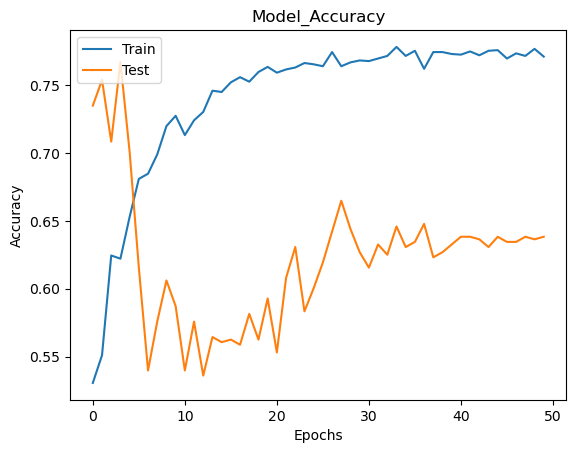

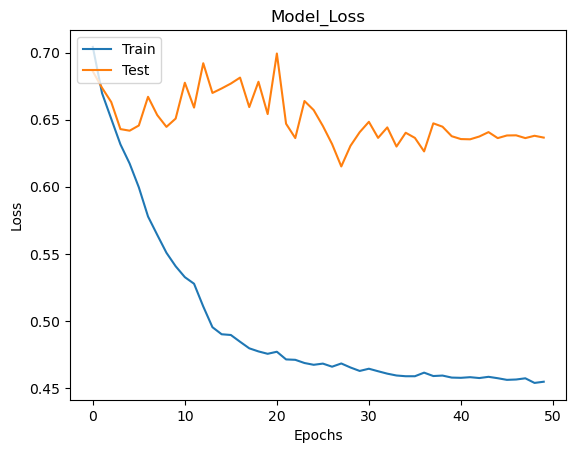

In [8]:
# Hyperparamètres d'entraînement
#Des hyperparamètres sont définis avant l'entraînement :
input_shape=(224,224,3)
lr=1e-5          #taux apprentissage
optim='adam'    #fonction d'optimisation
activ='relu'     #fonction d'activation pour le couches cachées 
init='normal'    #La méthode d'initialisation des poids.
batch_size=64    #Le nombre d'exemples utilisés avant de mettre à jour les poids, le modèle verra 64 images à la fois, puis mettra à jour les poids
epochs=50        #nombre d'époques pour l'entraînement (50 ici).c'est le nombre de passes complètes sur les données d'entraînement.

#je vais assigner le modèle à la variable model créer dans la fonction build
#Quand on dit que "le modèle est assigné à la variable model", cela signifie que la fonction build() crée un objet de type modèle de réseau de neurones 
#et que cet objet est stocké dans la variable model.

model = build(input_shape=input_shape, lr=lr, init=init, activ=activ, optim=optim)

#J'utilise la méthode fit() de Keras pour entraîner le modèle sur les données d’entraînemen
history= model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[learning_rate_reduction])#info train

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()#facultatif

In [9]:
#On voit ici que le modele arrivent pas generaliser avec les données de validation, le modèle est trop specifique, doonc on va effacer cette session et creer une autre pour un nouvel entrainemnt
#pour liberer la memoire backend de Keras
K.clear_session() # pour fermer la session dans laquelle on a commencer notre entraînement 
del model # supprimer l'objet model de la mémoire.
del history

On voit que ntr Model n'arrive pas a généraliser donc par faute de grande nmbre de données Test, Pour voir l'efficacité du model il faudrait qu'il arrive a generaliser c-a-d s'entrainer et etre tester sur toutes les donnees
Ce qui nous ramene a faire ce qu'on appelle Modele de validation croisee. Si l'ensemble de test est trop petit ou trop spécifique, la performance peut être trompeuse.

La validation croisée est une technique essentielle en apprentissage automatique pour évaluer la performance d'un modèle de manière plus robuste
Réduire le risque de surapprentissage (overfitting), Utiliser toutes les données efficacement, mesurer la variabilité des performances (l'écart-type) de savoir si le modèle est stable, Optimiser les hyperparamètres.

In [10]:
#6 Cross-Validating Model.  Define 3-fold cross validation test harness (validation croisée à 3 plis)
#KFold est une classe de Scikit-learn qui permet de diviser les données en plusieurs parties ou "plis" pour la validation croisée.
kfold= KFold(n_splits=3, shuffle=True, random_state=11) #divis les donnee en 3 ss ensemble en les melangeant et assurer sa reproductibilité 

cvscores= [] 
for train, test in kfold.split(X_train, y_train): #diviz les données en indice de train et test pour chq pil, on itere sur chq plie
    #ensuite on crée notre model sur les données d'entraînement train et on fait l'entrainement
    model=build(lr=lr, init=init, activ=activ, optim=optim, input_shape=input_shape)
    model.fit(X_train[train], y_train[train], epochs=epochs, batch_size=batch_size, verbose=1)

    #ensuite on fait l'evaluation du model sur les données test
    scores= model.evaluate(X_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #ensuite on ajoute le 2eme element de score au tableau cvscores
    cvscores.append(scores[1]*100)

    #Après chaque pli, on libère la mémoire GPU/CPU en supprimant le modèle et en nettoyant la session
    K.clear_session()
    del model

#o affiche les result la moyenne et l’écart-type de l’accuracy sur les 3 plis pour évaluer la performance générale du modèle.
print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))#affiche la precision obtenue


C:\Users\efiom\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729,218 (98.15 MB)

 Trainable params: 25,729,218 (98.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.5440 - loss: 0.6928
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.5815 - loss: 0.6681
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.6259 - loss: 0.6222
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.6895 - loss: 0.5935
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.7013 - loss: 0.5862
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.6903 - loss: 0.5667
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.6869 - loss: 0.5587
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.7138 - loss: 0.5421
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.6879 - loss: 0.5479
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.7194 - loss: 0.5253
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7287 - loss: 0.5200
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729,218 (98.15 MB)

 Trainable params: 25,729,218 (98.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.5080 - loss: 0.6956
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.5668 - loss: 0.6673
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.6503 - loss: 0.6495
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.6072 - loss: 0.6315
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.6321 - loss: 0.6178
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.6826 - loss: 0.5970
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.6799 - loss: 0.5908
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.7200 - loss: 0.5709
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.6925 - loss: 0.5635
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.7318 - loss: 0.5395
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.7198 - loss: 0.5454
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729,218 (98.15 MB)

 Trainable params: 25,729,218 (98.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.5473 - loss: 0.6894
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.6244 - loss: 0.6314
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.7019 - loss: 0.5953
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step - accuracy: 0.6795 - loss: 0.5755
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - accuracy: 0.7040 - loss: 0.5587
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.7268 - loss: 0.5431
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.7459 - loss: 0.5302
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.7278 - loss: 0.5115
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.7341 - loss: 0.5244
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.7624 - loss: 0.4951
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.7656 - loss: 0.4890
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy:

In [13]:
#7: Testing the model
#Tout d’abord, le modèle doit être équipé de toutes les données, de sorte qu’aucune donnée ne soit oubliée.

# Fitting model to all data, on va add now les batch_size,callbacks...
model=build(input_shape=input_shape, lr=lr, init=init, activ=activ, optim=optim)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[learning_rate_reduction])

# Testing model on test data to evaluate then
#Mes étiquettes (y_test) sont en one-hot encoding, j'utilise np.argmax() pour les convertir en classes avant de comparer avec les prédictions.
y_pred=model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) #obtenir les prédictions de classe. Convertir les probabilités en classes prédictes en prenant les plus élevées

#afficher le result 
print(accuracy_score(np.argmax(y_test, axis=1), y_pred_classes))

C:\Users\efiom\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729,218 (98.15 MB)

 Trainable params: 25,729,218 (98.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.5895 - loss: 0.6796 - learning_rate: 1.0000e-05
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.6550 - loss: 0.6185 - learning_rate: 1.0000e-05
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 206s 5s/step - accuracy: 0.6812 - loss: 0.5811 - learning_rate: 1.0000e-05
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.6997 - loss: 0.5575 - learning_rate: 1.0000e-05
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step - accuracy: 0.7248 - loss: 0.5410 - learning_rate: 1.0000e-05
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.7413 - loss: 0.5164 - learning_rate: 1.0000e-05
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.7391 - loss: 0.5062 - learning_rate: 1.0000e-05
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.7522 - loss: 0.4994 - learning_rate: 1.0000e-05
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.7560 - loss: 0.4860 - learning_

La fonction np.argmax() de NumPy renvoie l'indice de l'élément avec la valeur maximale le long d'un axe spécifié. Elle est très utilisée en apprentissage automatique, notamment dans les réseaux de neurones, pour convertir des probabilités en classes prédites.
y_pred = [[0.2, 0.8],   # Probabilité pour la classe 0 et 1
          [0.7, 0.3],
          [0.6, 0.4]]
import numpy as np

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

[1 0 0]  # Les classes prédites (classe 1 pour le 1er exemple, classe 0 pour les 2e et 3e exemples)
    

In [17]:
# save model
# serialize model to JSON

#le code suivant permet de réutiliser le modèle plus tard sans avoir à le réentraîner.
model_json=model.to_json()#convertit la structure du modèle (architecture du réseau de neurones) en une chaîne de caractères au format JSON.
with open("model.json", "w") as json_file: #ouvre (ou crée) un fichier appelé "model.json" en mode écriture ("w")
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")

# Clear memory, because of memory overload
del model #Cette commande supprime l'objet model de la mémoire, libérant ainsi les ressources associées.
K.clear_session() #Cette fonction libère la session de Keras en cours d'exécution, libérant ainsi la mémoire GPU ou CPU utilisée par le modèle.

Saved model to disk


Le CNN ci-dessus n'est pas un modèle très sophistiqué, donc le resnet50 est également essayé

Epoch 1/50
33/33 - 1098s - 33s/step - accuracy: 0.6837 - loss: 0.6348 - val_accuracy: 0.4640 - val_loss: 0.7004 - learning_rate: 1.0000e-05
Epoch 2/50
33/33 - 1011s - 31s/step - accuracy: 0.7738 - loss: 0.4856 - val_accuracy: 0.5549 - val_loss: 0.6971 - learning_rate: 1.0000e-05
Epoch 3/50
33/33 - 996s - 30s/step - accuracy: 0.8023 - loss: 0.4224 - val_accuracy: 0.5360 - val_loss: 0.7031 - learning_rate: 1.0000e-05
Epoch 4/50
33/33 - 919s - 28s/step - accuracy: 0.8065 - loss: 0.3927 - val_accuracy: 0.5360 - val_loss: 0.7491 - learning_rate: 1.0000e-05
Epoch 5/50
33/33 - 966s - 29s/step - accuracy: 0.8288 - loss: 0.3638 - val_accuracy: 0.5360 - val_loss: 0.8108 - learning_rate: 1.0000e-05
Epoch 6/50
33/33 - 921s - 28s/step - accuracy: 0.8445 - loss: 0.3447 - val_accuracy: 0.5360 - val_loss: 0.8656 - learning_rate: 1.0000e-05
Epoch 7/50
33/33 - 917s - 28s/step - accuracy: 0.8530 - loss: 0.3253 - val_accuracy: 0.5360 - val_loss: 1.0112 - learning_rate: 1.0000e-05
Epoch 8/50
33/33 - 922s -

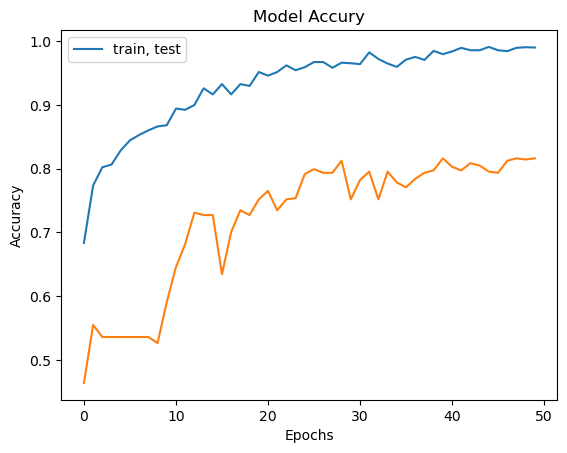

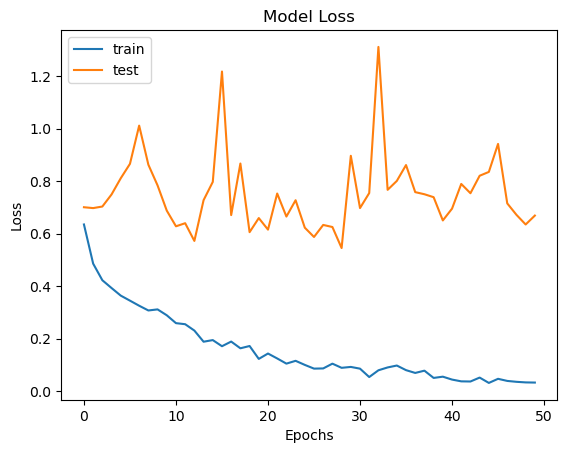

In [10]:
#on va essayer un autre model RetNet, un model déjà prentrainer puissant
input_shape=(224, 224, 3)
lr= 1e-5
epochs= 50
batch_size=64

model= ResNet50(input_shape=input_shape, classes=2, include_top=True, weights=None, input_tensor=None, pooling='avg')
#on compule ensuite pour pouvoir faire le train apres
model.compile(optimizer=Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])
#entrainemnt 
history=model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[learning_rate_reduction])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accury")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train, test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Le modèle que j'utilises ici est ResNet-50 (Residual Network avec 50 couches). ResNet est une architecture de réseau de neurones profonds développée pour résoudre les problèmes de dégradation des performances dans les réseaux très profonds. Ce problème survient lorsque la profondeur des réseaux augmente, ce qui rend leur entraînement plus difficile en raison de la perte de gradients (ce qui affecte négativement l'apprentissage).

ResNet introduit une idée clé : les "couches résiduelles", qui permettent au réseau d'apprendre des "résidus" (la différence entre l'entrée et la sortie attendue) au lieu d'apprendre les transformations directes. Cela permet de construire des réseaux beaucoup plus profonds tout en facilitant l'entraînement.
Explication des paramètres et du code :

    input_shape=(224,224,3) : Cela indique que l'entrée du modèle est une image de taille 224x224 avec 3 canaux (correspondant aux couleurs RGB).

    ResNet50() :
        include_top=True : Signifie que tu conserves les couches supérieures (ou "fully connected layers") du modèle ResNet-50 pré-entrainé.
        weights=None : Tu ne charges pas de poids pré-entraînés. Cela signifie que tu vas entraîner le modèle à partir de zéro avec tes données.
        classes=2 : Le modèle est configuré pour classer les images dans deux classes, probablement pour un problème de classification binaire (par exemple, "benign" vs "malignant" dans un contexte médical).

    Adam(lr) : L'optimiseur Adam est utilisé pour ajuster les poids du réseau pendant l'entraînement, avec un taux d'apprentissage (lr=1e-5) qui est un petit nombre pour permettre un ajustement progressif.

    loss="binary_crossentropy" : Cette fonction de perte est utilisée pour la classification binaire, adaptée à ton problème à deux classes.

Ce modèle est plus sophistiqué et beaucoup plus profond que le CNN simple mentionné plus haut. ResNet-50 contient environ 23 millions de paramètres et est bien connu pour ses performances élevées dans des tâches de vision par ordinateur. Il est couramment utilisé pour des applications de classification d'images.

In [11]:
# Train ResNet50 on all the data,vu l'entrainement s'est bien passer sur les donnees 0.8, on va entrainer sur toute la totalite des donnees
model.fit(X_train, y_train, epochs=epochs, batch_size=50, verbose=1, callbacks=[learning_rate_reduction])

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1169s 22s/step - accuracy: 0.9409 - loss: 0.1726 - learning_rate: 2.5000e-06
Epoch 2/50


C:\Users\efiom\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1159s 22s/step - accuracy: 0.9559 - loss: 0.1480 - learning_rate: 2.5000e-06
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1124s 21s/step - accuracy: 0.9587 - loss: 0.1041 - learning_rate: 2.5000e-06
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1083s 20s/step - accuracy: 0.9509 - loss: 0.1288 - learning_rate: 2.5000e-06
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1231s 23s/step - accuracy: 0.9668 - loss: 0.0825 - learning_rate: 2.5000e-06
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1313s 24s/step - accuracy: 0.9682 - loss: 0.0953 - learning_rate: 2.5000e-06
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1284s 24s/step - accuracy: 0.9632 - loss: 0.1108 - learning_rate: 2.5000e-06
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1170s 22s/step - accuracy: 0.9732 - loss: 0.0808 - learning_rate: 2.5000e-06
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1093s 21s/step - accuracy: 0.9778 - loss: 0.0703 - learning_rate: 2.5000e-06
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1093s 21s/step - accuracy: 0.9686 - loss: 0.0877 - l

In [12]:
# Testing model on test data to evaluate
y_pred=model.predict(X_test)

print(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

#save de la hierarchi du mode
resnet50_json=model.to_json()

with open("resnet50.json", "w") as json_file:
    json_file.write(resnet50_json)

#save des poids
model.save_weights("resnet50.weights.h5")
print("save to disk")

23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step
0.5
save to disk


In [36]:
from werkzeug.serving import run_simple
#Utilisation du model en production en utilisant flask
from flask import Flask, request, jsonify
from keras.models import model_from_json
import numpy as np
from PIL import Image

app= Flask(__name__)
#chargement du model
with open("resnet50.json", "r") as json_file:
    loaded_model_json= json_file.read()

load_model=model_from_json(loaded_model_json)
load_model.load_weights("resnet50.weights.h5")
load_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

# Route pour la prédiction
@app.route('/predict', methods=['POST'])
def predict():
    # Recevoir l'image dans la requête POST
    file= request.files['image'] #demander du fichier qui est une image
    img= Image.open(file)     #ensuite on ouvre l'image
    img= img.resize((224, 224)) #esuite on redimensionne

    #le pretraitement des images
    img_array= np.asarray(img)/255.0 #normaliser les pixel
    img_array= np.expand_dims(img_array, axis=0)# Ajouter une dimension pour le batch

    #now on fait la prediction
    y_pred=load_model.predict(img_array)
    predicted_class=np.argmax(y_pred, axis=1)[0]

    # Mapper la prédiction
    labels={0: 'benign', 1: 'malignant'}
    result=labels[predicted_class]#si il truve que argmax c'est 1 alors il va afficher malignant sinon le contraire

    # Retourner le résultat sous forme JSON
    return jsonify({"Prediction: ": result})




run_simple('localhost', 5000, app)


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [06/Oct/2024 10:25:17] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Oct/2024 10:25:17] "GET /favicon.ico HTTP/1.1" 404 -
